<a href="https://colab.research.google.com/github/MehraeenTimas/nlp-course/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**XGBoost**

XGBoost is a powerful gradient boosting algorithm that builds decision trees one after another, where each new tree corrects the mistakes of the previous ones. It uses gradient descent to minimize errors and adds smart tricks like regularization (to avoid overfitting), parallel processing, and handling missing values automatically.It’s extremely fast and accurate, winning many machine learning competitions. For prediction: trees vote (classification) or average (regression), but with weighted influence based on performance. Think of it as a team of improving experts — each learns from the last.



1-import libs

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt

2-load data

In [2]:

from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


# df = pd.read_csv('your_file.csv')
# X = df.drop('target', axis=1)
# y = df['target']

3-split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4-add model

In [4]:
#Classification
model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

#Regression
# model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

5-train

In [5]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

6-predict

In [6]:
y_pred = model.predict(X_test)

7-evaluate

In [7]:
if 'Classifier' in str(type(model)):
    score = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {score:.4f}")
else:
    score = mean_squared_error(y_test, y_pred)
    print(f"MSE: {score:.4f}")


Accuracy: 1.0000


8-feature importance

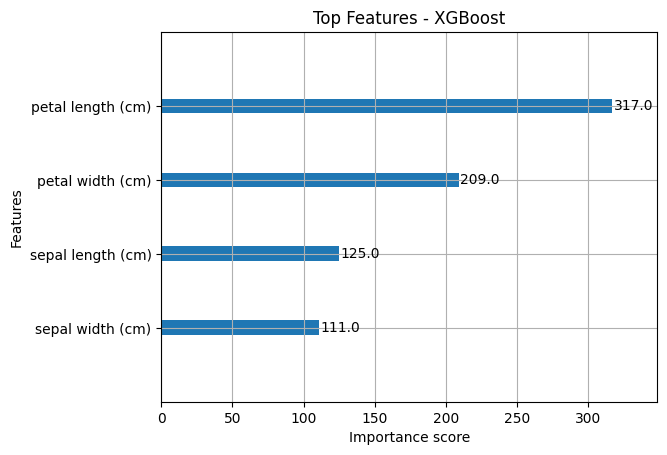

In [8]:
xgb.plot_importance(model, max_num_features=10)
plt.title("Top Features - XGBoost")
plt.show()